# EDA and Data Preprocessing on Red Wine quality Dataset

Link to the dataset: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009  

Problem Statement:  

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.
- Identify target and independent variables.
- Perform EDA and any data cleaning if necessary.
- Implement Feature Scaling to normalize the data. Choose one scaler to proceed and provide the reasoning as to why it is selected?
- Implement PCA with number of original features to answer how much variance is explained by first 2 components. Visualize the PCA components.
- Submit the .ipynb notebook with clear comments as 'Name_Assignment2.ipynb'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('./winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data cleaning

In [3]:
print('Before cleaning rows:', dataset.shape[0])
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)
print('After cleaning rows:', dataset.shape[0])

Before cleaning rows: 1599
After cleaning rows: 1359


## EDA

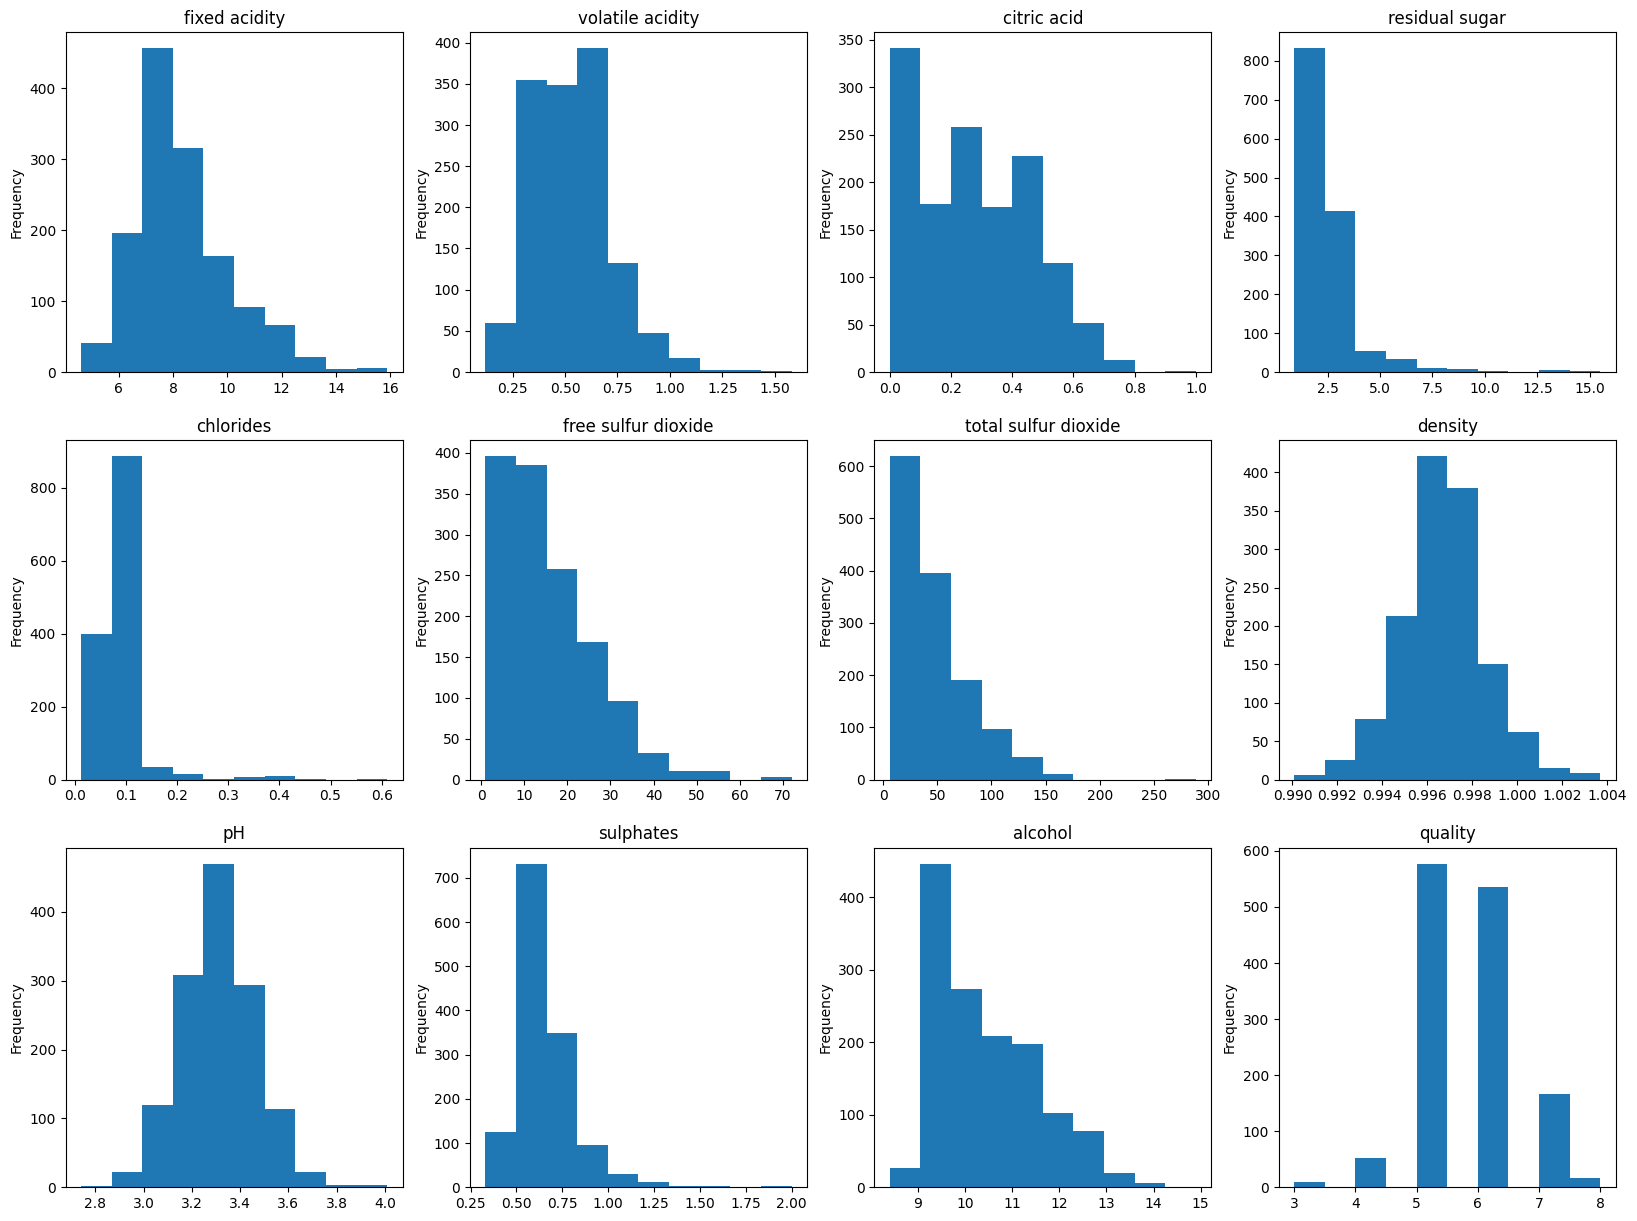

In [4]:
plt.subplots(3, 4, figsize=(20, 15))
for i, column in enumerate(dataset.columns):
    plt.subplot(3, 4, i + 1)
    dataset[column].plot.hist(title=column)

## Feature Scaling

- Split data into train data and test data
- Perform feature scaling to normalize

In [5]:
from sklearn.model_selection import train_test_split

data = dataset.drop('quality', axis=1)
target = dataset['quality']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
print('Train size:', x_train.shape[0])
print('Test size:', x_test.shape[0])

Train size: 1087
Test size: 272


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

## PCA

- Implement PCA
- Visualize PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled_x_train)
pca_x_train = pca.transform(scaled_x_train)

print('Previous data shape:', scaled_x_train.shape)
print('After PCA shape:', pca_x_train.shape)

Previous data shape: (1087, 11)
After PCA shape: (1087, 2)


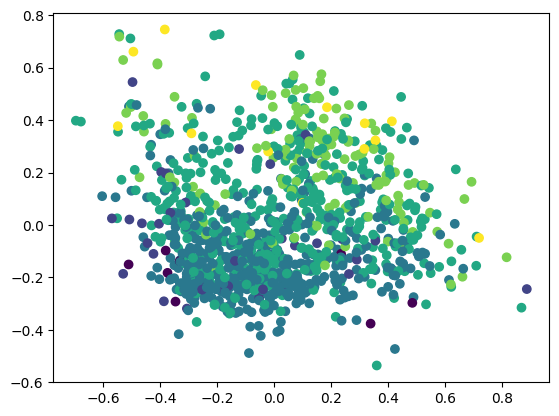

In [8]:
import matplotlib.pyplot as plt

plt.scatter(pca_x_train[:, 0], pca_x_train[:, 1], c=y_train)

## Additional liner-ML

After PCA, we can make model. This time just make linear model and try to predict score using with test data.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(pca_x_train, y_train)

pca_x_test = pca.transform(scaled_x_test)
predicted_y = model.predict(pca_x_test)
print(accuracy_score(y_test, predicted_y))

0.5147058823529411
